<a href="https://colab.research.google.com/github/MST-Capstone2-MarsFarm/Tutorials/blob/convolutions/Messing_With_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code from https://learnopencv.com/image-filtering-using-convolution-in-opencv/

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [ ]:
import cv2
import numpy as np

def processImage(image):
  image = cv2.imread(image)
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
  return image

In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 57. ... 14.  0.  0.]
 ...
 [ 0.  0. 31. ... 31.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


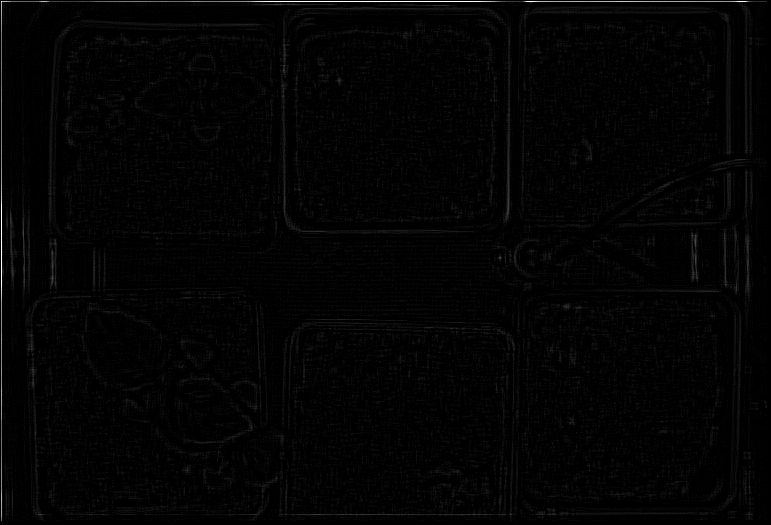

In [ ]:
from google.colab.patches import cv2_imshow
# Grayscale Image
#image = processImage('IMG_1245.jpeg')
image = processImage('blur.jpg')

# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Convolve and Save Output
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)
cv2_imshow(output)

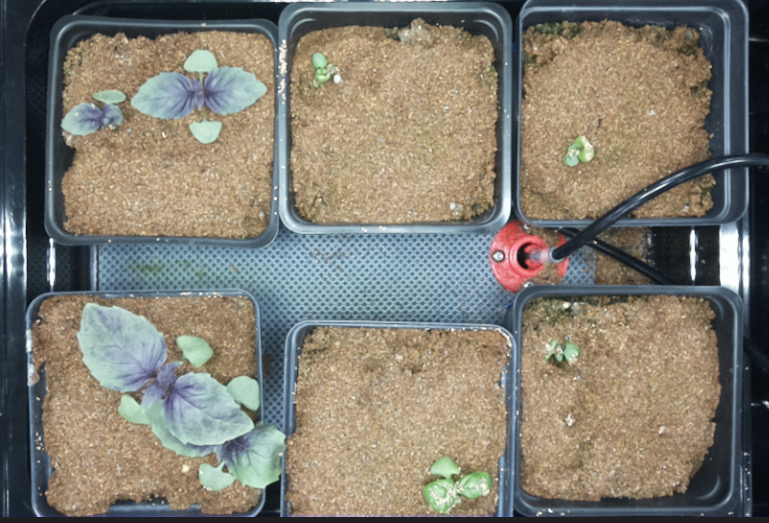

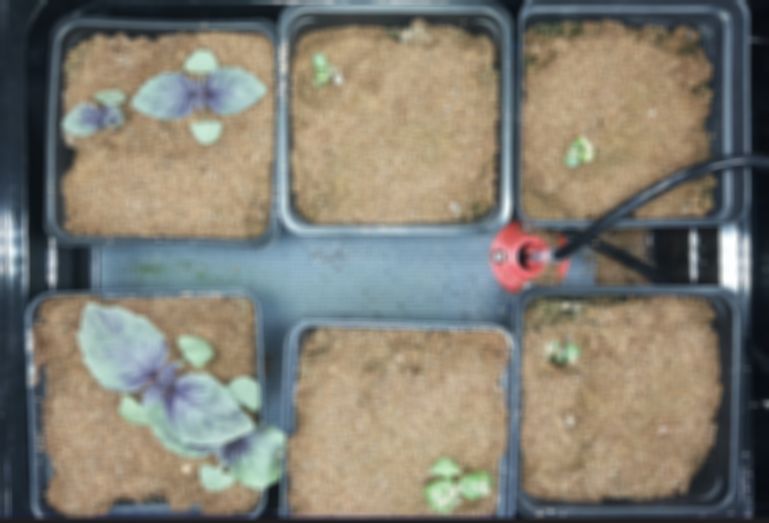

In [ ]:
from google.colab.patches import cv2_imshow

image = cv2.imread('IMG_1245.jpeg')
img_blur = cv2.blur(src=image, ksize=(8,8)) # Using the blur function to blur an image where ksize is the kernel size

# Display using cv2.imshow()
cv2_imshow(image)
cv2_imshow(img_blur)

cv2.waitKey()
cv2.imwrite('blur.jpg', img_blur)
cv2.destroyAllWindows()

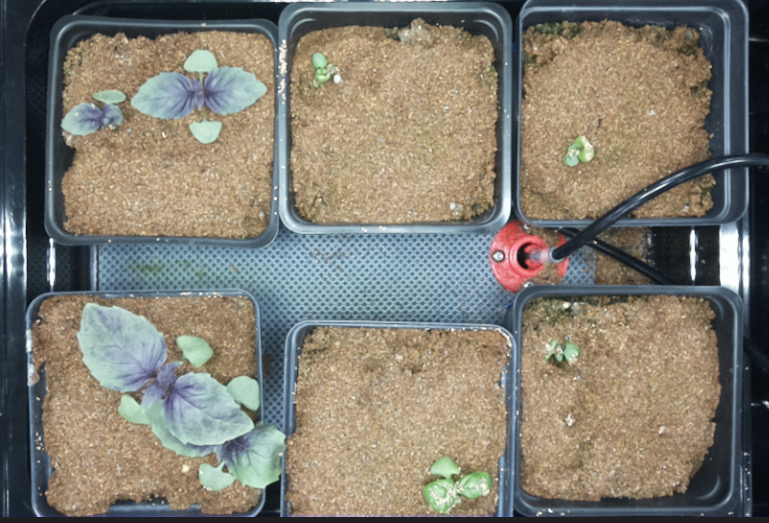

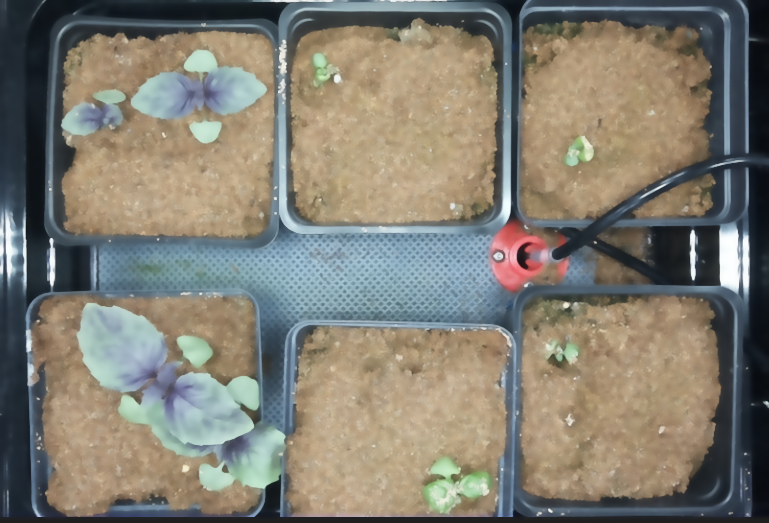

In [ ]:
"""
Apply Bilateral Filtering
"""
# Using the function bilateralFilter() where d is diameter of each...
# ...pixel neighborhood that is used during filtering.
# sigmaColor is used to filter sigma in the color space.
# sigmaSpace is used to filter sigma in the coordinate space.
bilateral_filter = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

cv2_imshow(image)
cv2_imshow(bilateral_filter)

cv2.waitKey(0)
cv2.imwrite('bilateral_filtering.jpg', bilateral_filter)
cv2.destroyAllWindows()

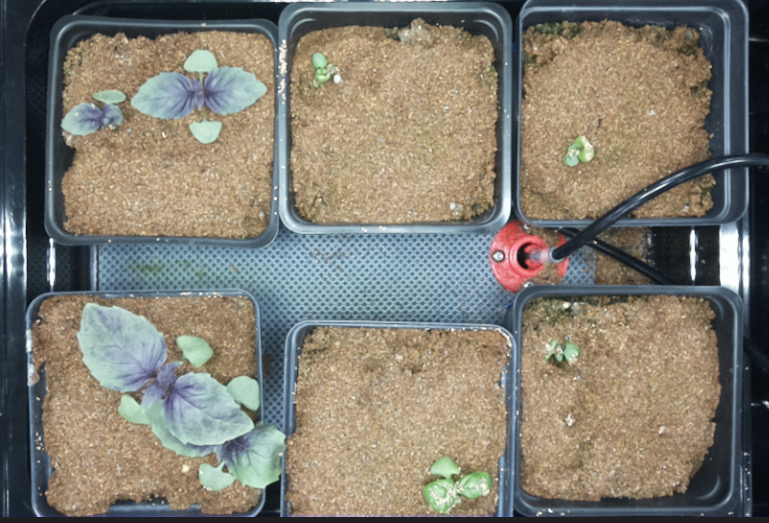

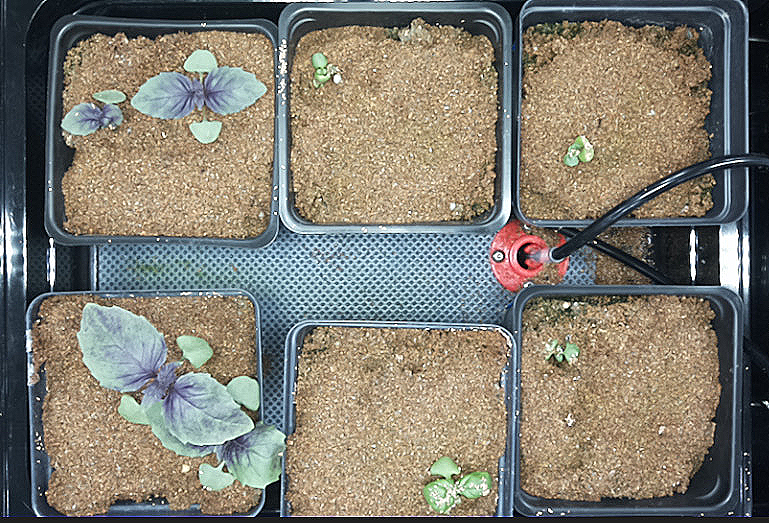

In [ ]:
"""
Apply sharpening using kernel
"""
kernel3 = np.array([[0, -1,  0],
                   [-1,  5, -1],
                    [0, -1,  0]])
sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel3)

cv2_imshow(image)
cv2_imshow(sharp_img)

cv2.waitKey()
cv2.imwrite('sharp_image.jpg', sharp_img)
cv2.destroyAllWindows()

In [ ]:
!echo "hello"

hello
